<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/metpy_150x150.png" width=150 alt="MetPy logo"></img>
<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/unidata_150x150.png" width=150 alt="Unidata logo"></img>

# Calculations

---

## Overview
`metpy.calc` is a large suite of a variety of unit-aware meteorological calculations loosely gathered in the following categories,
 - Dry and Moist thermodynamics
 - Sounding calculations and indices
 - Boundary layer, calulcations related to turbulence
 - Core mathematics, including derivatives and deltas
 - Heat/chill indices
 - Standard atmosphere and height/pressure conversion
 - Smoothing via interpolation or filtering
 - Miscellaneous!
 
Separately, `metpy.interpolate` contains tools for interpolation for grids, points, profiles, slices, and more. These rely on a variety of SciPy interpolation tools or internally-developed routines.

---

## Imports

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import metpy.interpolate
import numpy as np
import xarray as xr

from metpy.cbook import get_test_data

## [Meteorological calculations](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html)

In [2]:
dir(mpcalc)

['InvalidSoundingError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_momentum',
 'absolute_vorticity',
 'add_height_to_pressure',
 'add_pressure_to_height',
 'advection',
 'ageostrophic_wind',
 'altimeter_to_sea_level_pressure',
 'altimeter_to_station_pressure',
 'angle_to_direction',
 'apparent_temperature',
 'azimuth_range_to_lat_lon',
 'basic',
 'brunt_vaisala_frequency',
 'brunt_vaisala_frequency_squared',
 'brunt_vaisala_period',
 'bulk_shear',
 'bunkers_storm_motion',
 'cape_cin',
 'coriolis_parameter',
 'critical_angle',
 'cross_section_components',
 'cross_sections',
 'cross_totals',
 'density',
 'dewpoint',
 'dewpoint_from_relative_humidity',
 'dewpoint_from_specific_humidity',
 'divergence',
 'dry_lapse',
 'dry_static_energy',
 'el',
 'equivalent_potential_temperature',
 'exceptions',
 'exner_function',
 'find_bounding_indices',
 'find_intersections',
 'first_derivative',

## [Interpolation](https://unidata.github.io/MetPy/latest/api/generated/metpy.interpolate.html)

In [3]:
dir(metpy.interpolate)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cross_section',
 'geodesic',
 'geometry',
 'grid',
 'interpolate_1d',
 'interpolate_nans_1d',
 'interpolate_to_grid',
 'interpolate_to_isosurface',
 'interpolate_to_points',
 'interpolate_to_slice',
 'inverse_distance_to_grid',
 'inverse_distance_to_points',
 'log_interpolate_1d',
 'natural_neighbor_to_grid',
 'natural_neighbor_to_points',
 'one_dimension',
 'points',
 'remove_nan_observations',
 'remove_observations_below_value',
 'remove_repeat_coordinates',
 'set_module',
 'slices',
 'tools']

## [Cross sections](https://unidata.github.io/MetPy/latest/examples/cross_section.html)

In [4]:
data = xr.open_dataset(get_test_data('narr_example.nc', False))
data = data.metpy.parse_cf().squeeze()
data

<xarray.Dataset>
Dimensions:              (isobaric: 29, y: 118, x: 292)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
Data variables:
    Temperature          (isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (isobaric, y, x) float32 ...
    v_wind               (isobaric, y, x) float32 ...
    Geopotential_height  (isobaric, y, x) float32 ...
    Specific_humidity    (isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [5]:
start = (37.0, -105.0)
end = (35.5, -65.0)

In [6]:
cross = metpy.interpolate.cross_section(data, start, end).set_coords(('lat', 'lon'))
cross

<xarray.Dataset>
Dimensions:              (isobaric: 29, index: 100)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
    metpy_crs            object Projection: lambert_conformal_conic
    x                    (index) float64 1.818e+05 2.18e+05 ... 3.712e+06
    y                    (index) float64 -1.454e+06 -1.447e+06 ... -5.573e+05
  * index                (index) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    lat                  (index) float64 37.0 37.05 37.11 ... 35.66 35.58 35.5
    lon                  (index) float64 -105.0 -104.6 -104.2 ... -65.39 -65.0
Data variables:
    Temperature          (isobaric, index) float64 287.7 286.9 ... 211.4 211.4
    Lambert_Conformal    |S1 b'd'
    u_wind               (isobaric, index) float64 -2.729 0.4776 ... 24.6 23.68
    v_wind               (isobaric, index) float64 8.473 5.723 ... -1.082
    Geopotential_height  (isobaric, index) float64 118.6 127.4 ... 1.636e+04
    Specific_humidity    (isobaric, index) float64 0.006367 ... 4.223e-06
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [7]:
cross['Potential_temperature'] = mpcalc.potential_temperature(
    cross['isobaric'],
    cross['Temperature']
)
cross['Relative_humidity'] = mpcalc.relative_humidity_from_specific_humidity(
    cross['isobaric'],
    cross['Temperature'],
    cross['Specific_humidity']
)
cross['u_wind'] = cross['u_wind'].metpy.convert_units('knots')
cross['v_wind'] = cross['v_wind'].metpy.convert_units('knots')
cross['t_wind'], cross['n_wind'] = mpcalc.cross_section_components(
    cross['u_wind'],
    cross['v_wind']
)

cross

Magnitude,[[-5.304452352369603 0.9284748187705486 -0.654877670471608 ... -15.404757939953049 -15.563028625633354 -17.071137296642874] [-5.308167210178918 0.9203170427109714 -0.6565652837700618 ... -15.642972225554375 -15.7610723923662 -17.206155427765875] [-5.302524406019374 0.930402765120778 -0.6529497241213785 ... -12.02292749099507 -12.134891011495888 -13.156987341750552] ... [21.815738215338694 23.57662916337869 24.044959456472778 ... 72.36756196262716 72.99770390534991 72.56693318468078] [20.611460154213084 21.792457513404372 21.866930321203107 ... 61.80663229459895 61.896133673813246 61.44757336309091] [20.760849844784754 20.87970427725861 20.011810905340973 ... 48.33716621700138 47.82463003249378 46.03015512093421]]
Units,knot
Magnitude,[[16.470476369926597 11.12519502394431 10.204518435020082 ... 25.120269882791565 24.456600478754105 23.1577536271338] [16.479189350897993 11.129279057170688 10.210629812583603 ... 26.482586062843264 25.81678858899995 24.641764563326518] [16.492536081826355 11.132640373444122 10.212785513545278 ... 28.64020426970807 28.169494336890065 27.32449795613864] ... [21.266504544819227 21.767777335955895 22.1915269742229 ... 7.727417550399527 6.39560393861172 4.587033153354046] [18.390149089977463 18.23306045347366 17.664341191850486 ... 7.987517129339053 6.929124268851158 5.36044817747826] [8.915577631280845 8.514228283102815 7.666121106187656 ... -0.977334026844132 -1.539685777991803 -2.1036386004669683]]
Units,knot
Magnitude,[[287.7170525300504 286.9115277677471 287.1564236647432 ... 291.4427453231828 291.28206241182005 291.06972426497373] [288.2895034464193 287.4838904767359 287.7257033918808 ... 291.55326566729696 291.41967536932964 291.236064771098] [288.9854797524146 288.1780204849547 288.4279524993903 ... 292.13902349220405 292.0223426470998 291.8874984956785] ... [369.6777506644047 368.85784890232463 368.1910386320287 ... 371.1470784960522 371.1303912151486 371.1261530989778] [387.8897214202701 387.46317359233166 387.0923830089991 ... 388.0710904114131 388.03417787584834 387.9902820771881] [415.71954399113037 415.5374919620302 415.3724137068711 ... 408.3234763127081 408.22432865868524 408.1459236830185]]
Units,kelvin
Magnitude,[[0.6113830426216016 0.6195101281264838 0.5719778549689715 ... 0.7507220276716604 0.7604980526617794 0.7638327466599325] [0.6122243928651312 0.6205027515269524 0.5731702252501216 ... 0.7876021515450274 0.7987085584681859 0.7981607424718543] [0.6122867659483865 0.6205189682386931 0.5727967959266058 ... 0.7717550323530822 0.7725858652257236 0.7730780790593145] ... [0.23663321504417875 0.2671936925228155 0.2986195923883378 ... 0.07559625868725367 0.07529050929084256 0.07506483476278804] [0.04234970461039493 0.04683996279980512 0.05321984842149346 ... 0.04382477556454339 0.04400763697244769 0.04426940339590323] [0.025368858584967964 0.026675489056944272 0.028236787295508922 ... 0.043801911199982106 0.04440179775599546 0.044977490995210735]]
Units,dimensionless
Magnitude,[[-2.0266010554841056 3.070015501565309 1.3496445687267027 ... -7.221954028564756 -7.536139096083565 -9.329973715314324] [-2.028564831191947 3.0628054779530496 1.3491823618318006 ... -7.043516081461062 -7.318310083963517 -9.013166762504948] [-2.0204526754743886 3.07335179386304 1.3531491638116002 ... -2.9450756013973844 -3.154456442643065 -4.345314889801722] ... [25.509350560713912 27.353053180505015 27.914208120388814 ... 71.38383412446827 71.56921996166761 70.59573829010684] [23.77268044670004 24.916783463578124 24.894369016825827 ... 61.37989162154378 61.13536370288355 60.22169671739029] [22.09103865175496 22.13513970893989 21.12328064621793 ... 45.85134076060366 45.17508046244205 43.274501556531426]]
Units,knot
Magnitude,[[17.184489947996145 10.733453993474559 10.136050551968136 ... 28.56882752550634 27.991780481136946 27.21501188916521] [17.193756003841035 10.739043644370907 10.142373789995865 ... 29.940254271391307 29.34894058601577 28.671085963216107] [17.205763059886173 10.740383593752195 10.1437

/tmp/ipykernel_3243/296534753.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000, 50, -100))


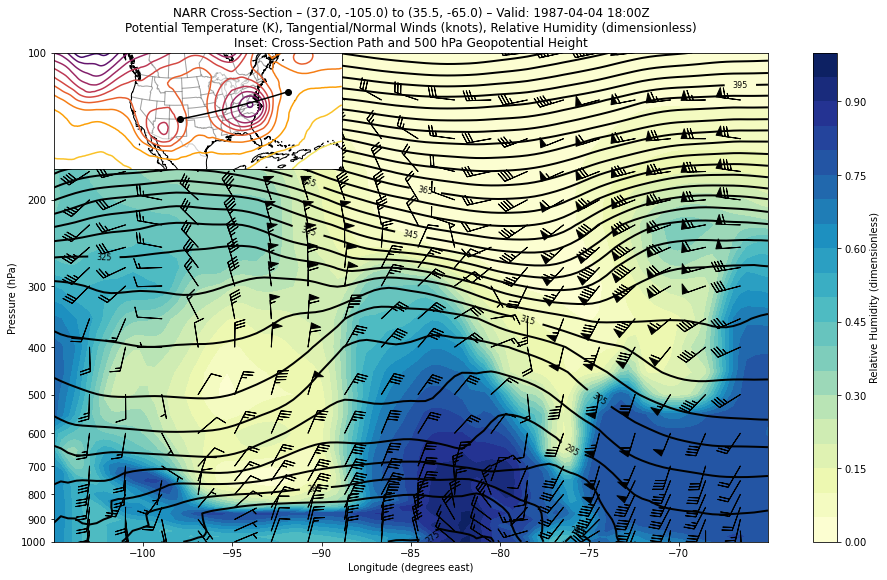

In [8]:
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

# Define the CRS and inset axes
data_crs = data['Geopotential_height'].metpy.cartopy_crs
ax_inset = fig.add_axes([0.125, 0.665, 0.25, 0.25], projection=data_crs)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(data['x'], data['y'], data['Geopotential_height'].sel(isobaric=500.),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Plot the path of the cross section
endpoints = data_crs.transform_points(ccrs.Geodetic(),
                                      *np.vstack([start, end]).transpose()[::-1])
ax_inset.scatter(endpoints[:, 0], endpoints[:, 1], c='k', zorder=2)
ax_inset.plot(cross['x'], cross['y'], c='k', zorder=2)

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

# Set the titles and axes labels
ax_inset.set_title('')
ax.set_title(f'NARR Cross-Section \u2013 {start} to {end} \u2013 '
             f'Valid: {cross["time"].dt.strftime("%Y-%m-%d %H:%MZ").item()}\n'
             'Potential Temperature (K), Tangential/Normal Winds (knots), Relative Humidity '
             '(dimensionless)\nInset: Cross-Section Path and 500 hPa Geopotential Height')
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Longitude (degrees east)')
rh_colorbar.set_label('Relative Humidity (dimensionless)')